In [2]:

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:

import os

# Dataset ka relative path (same folder mein hai)
directory_path = r'.'  # Current directory (same folder)

for dirname, _, filenames in os.walk(directory_path):
    for filename in filenames:
        print(os.path.join(dirname, filename))

.\project.ipynb
.\UberDataset.csv


#### Data Understanding

In [4]:
df=pd.read_csv(r"C:\Users\MAYANK\Desktop\Project\Project\UberDataset.csv")

df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


#### Data Cleaning

In [6]:
df['PURPOSE'] = df['PURPOSE'].fillna("UNKNOWN")

df.dropna(inplace=True)

df.isnull().sum()

START_DATE    0
END_DATE      0
CATEGORY      0
START         0
STOP          0
MILES         0
PURPOSE       0
dtype: int64

#### Data Preprocessing

In [7]:
df['START_DATE'] = pd.to_datetime(df['START_DATE'], format='%d-%m-%Y %H:%M', errors='coerce')
df['END_DATE'] = pd.to_datetime(df['END_DATE'], format='%d-%m-%Y %H:%M', errors='coerce')

In [8]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-02-01 01:25:00,2016-02-01 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,UNKNOWN
2,2016-02-01 20:25:00,2016-02-01 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-05-01 17:31:00,2016-05-01 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-06-01 14:42:00,2016-06-01 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  421 non-null    datetime64[ns]
 1   END_DATE    420 non-null    datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1155 non-null   float64       
 6   PURPOSE     1155 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 72.2+ KB


In [10]:
df['START_DATE'] = df['START_DATE'].fillna(pd.Timestamp('2020-01-01'))
df['END_DATE'] = df['END_DATE'].fillna(pd.Timestamp('2020-01-01'))

In [11]:
df['TIME_DAY'] = df['START_DATE'].apply(lambda i : i.hour)
df['TIME_OF_DAY'] = df['START_DATE'].apply(lambda i : i.hour)
df['TIME_OF_DAY'] = pd.cut(x = df['TIME_OF_DAY'], bins = [0, 6, 11, 17, 21, 24],\
                             labels = ['Night', 'Morning','Afternoon','Evening','Night'], ordered = False)

In [14]:
df['MONTH_OF_THE_RIDE'] = df['START_DATE'].apply(lambda i: i.month)

month_label = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'Aug',
    9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}

df['MONTH_OF_THE_RIDE'] = df['MONTH_OF_THE_RIDE'].map(month_label)





In [15]:
df['DAY_OF_THE_RIDE'] = df['START_DATE'].apply(lambda i: i.weekday())

day_label = {
    0: 'Mon', 1: 'Tues', 2: 'Wed', 3: 'Thurs', 4: 'Fri', 5: 'Sat', 6: 'Sun'
}

df['DAY_OF_THE_RIDE'] = df['DAY_OF_THE_RIDE'].map(day_label)


In [17]:
# duration of the ride

df['DURATION_OF_THE_RIDE'] = (df['END_DATE'] - df['START_DATE']).dt.total_seconds() / 60


df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,TIME_DAY,TIME_OF_DAY,MONTH_OF_THE_RIDE,DAY_OF_THE_RIDE,DURATION_OF_THE_RIDE
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,Evening,Jan,Fri,6.0
1,2016-02-01 01:25:00,2016-02-01 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,UNKNOWN,1,Night,Feb,Mon,12.0
2,2016-02-01 20:25:00,2016-02-01 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,Evening,Feb,Mon,13.0
3,2016-05-01 17:31:00,2016-05-01 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,Afternoon,May,Sun,14.0
4,2016-06-01 14:42:00,2016-06-01 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,Afternoon,June,Wed,67.0


#### Data Exploration

In [18]:
# Summary statistics of data

df.describe()

,START_DATE,END_DATE,MILES,TIME_DAY,DURATION_OF_THE_RIDE
count,1155,1155,1155.000000,1155.000000,1.155000e+03
mean,2018-09-19 20:54:59.792207616,2018-09-21 01:10:08.363636480,10.566840,5.463203,1.695143e+03
min,2016-01-01 21:11:00,2016-01-01 21:17:00,0.500000,0.000000,0.000000e+00
25%,2016-09-08 00:17:30,2016-09-08 00:35:30,2.900000,0.000000,0.000000e+00
50%,2020-01-01 00:00:00,2020-01-01 00:00:00,6.000000,0.000000,0.000000e+00
75%,2020-01-01 00:00:00,2020-01-01 00:00:00,10.400000,13.000000,1.100000e+01
max,2020-01-01 00:00:00,2020-01-01 00:00:00,310.300000,23.000000,1.611373e+06
std,NaN,NaN,21.579106,7.746928,4.753502e+04


In [19]:
print('Min Timestamp in START_TIME is - {}'.format(df['START_DATE'].min()))
print('Max Timestamp in START_TIME is - {}'.format(df['START_DATE'].max()))

Min Timestamp in START_TIME is - 2016-01-01 21:11:00
Max Timestamp in START_TIME is - 2020-01-01 00:00:00


In [20]:
print("Total number of unique categories in CATEGORY - {}".format(df['CATEGORY'].nunique()))
print("Total number of unique categories in PURPOSE - {}".format(df['PURPOSE'].nunique()))
print("Total number of unique location in START - {}".format(df['START'].nunique()))
print("Total number of unique location in STOP - {}".format(df['STOP'].nunique()))

Total number of unique categories in CATEGORY - 2
Total number of unique categories in PURPOSE - 11
Total number of unique location in START - 177
Total number of unique location in STOP - 188


#### Data Visualization

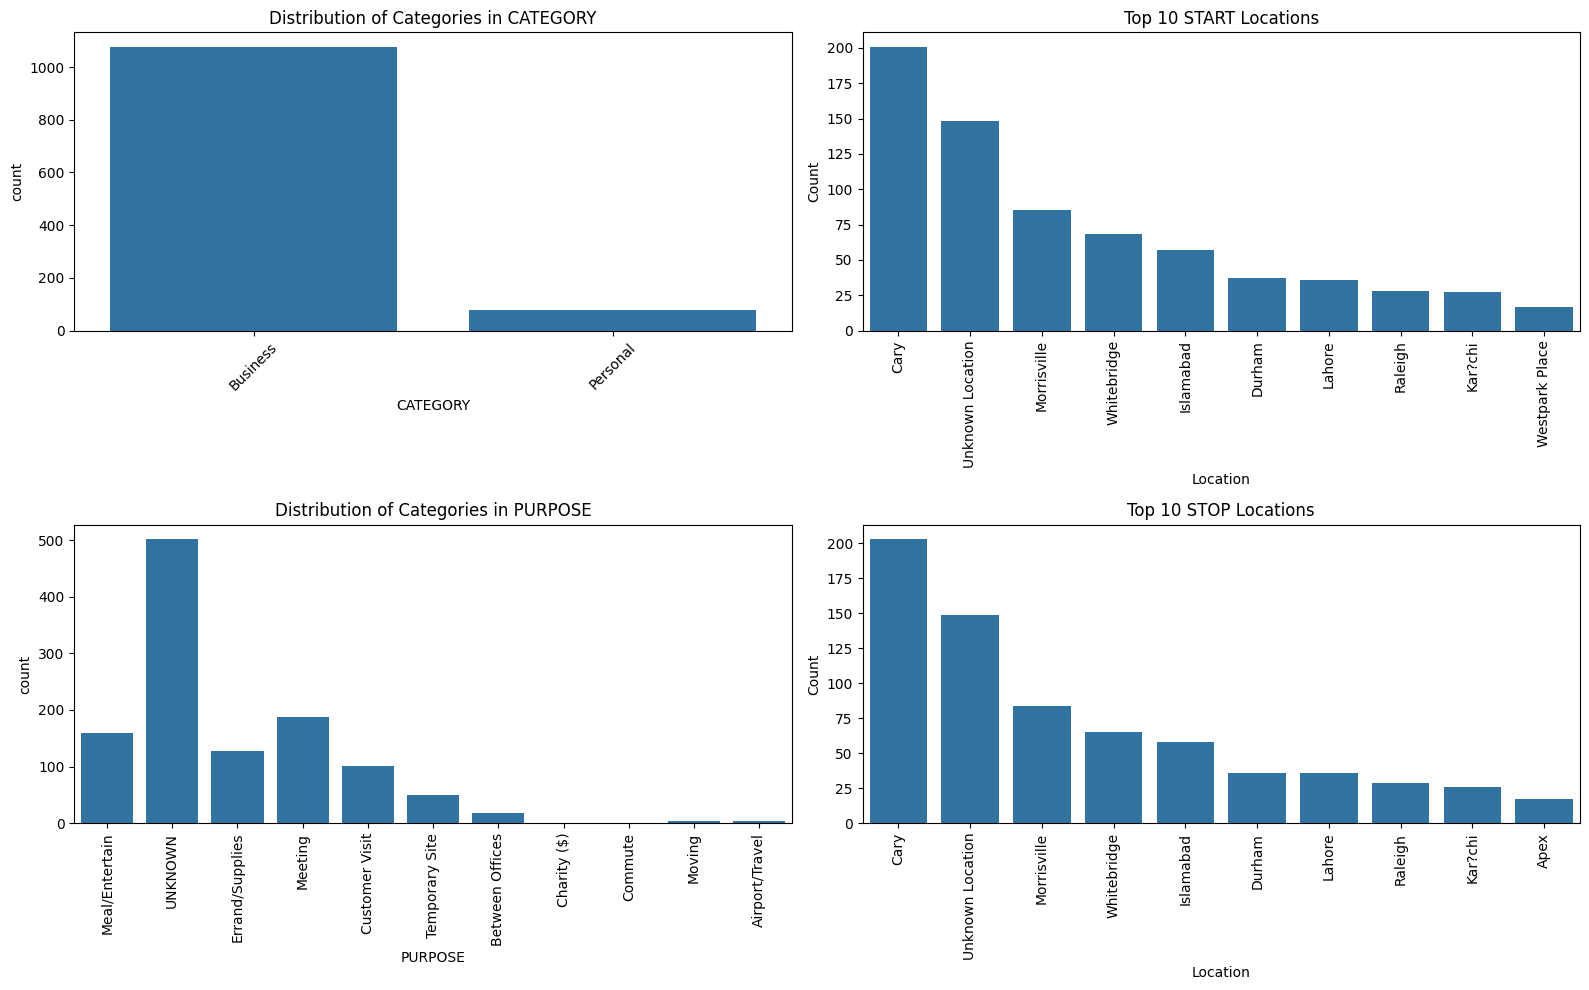

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Distribution of Categories in CATEGORY
sns.countplot(data=df, x='CATEGORY', ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Categories in CATEGORY')
axes[0, 0].tick_params(axis='x', rotation=45)

# Distribution of Categories in PURPOSE
sns.countplot(data=df, x='PURPOSE', ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Categories in PURPOSE')
axes[1, 0].tick_params(axis='x', rotation=90)

# Top 10 locations for START
temp_start = df['START'].value_counts().nlargest(10).reset_index()
temp_start.columns = ['Location', 'Count']
sns.barplot(data=temp_start, x='Location', y='Count', ax=axes[0, 1])
axes[0, 1].set_title('Top 10 START Locations')
axes[0, 1].tick_params(axis='x', rotation=90)

# Top 10 locations for STOP
temp_stop = df['STOP'].value_counts().nlargest(10).reset_index()
temp_stop.columns = ['Location', 'Count']
sns.barplot(data=temp_stop, x='Location', y='Count', ax=axes[1, 1])
axes[1, 1].set_title('Top 10 STOP Locations')
axes[1, 1].tick_params(axis='x', rotation=90)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


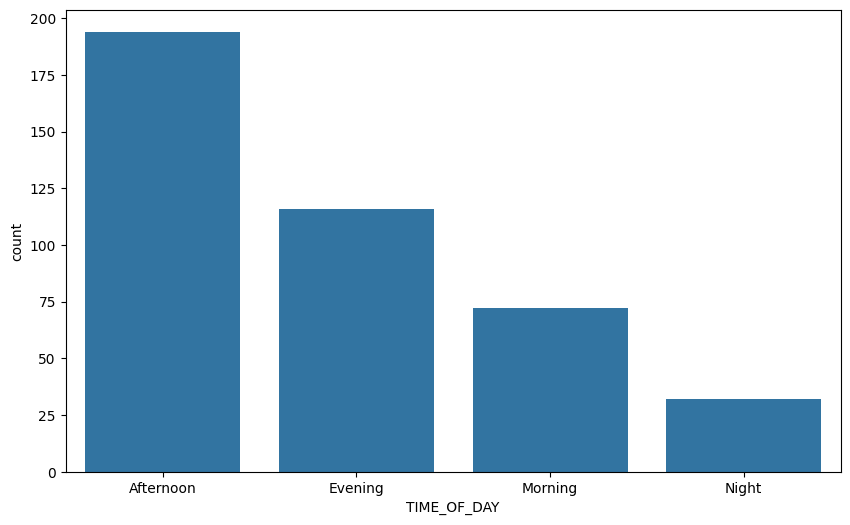

In [24]:
# Convert 'TIME_OF_DAY' column to categorical data type
df['TIME_OF_DAY'] = df['TIME_OF_DAY'].astype('category')

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='TIME_OF_DAY')
plt.show()

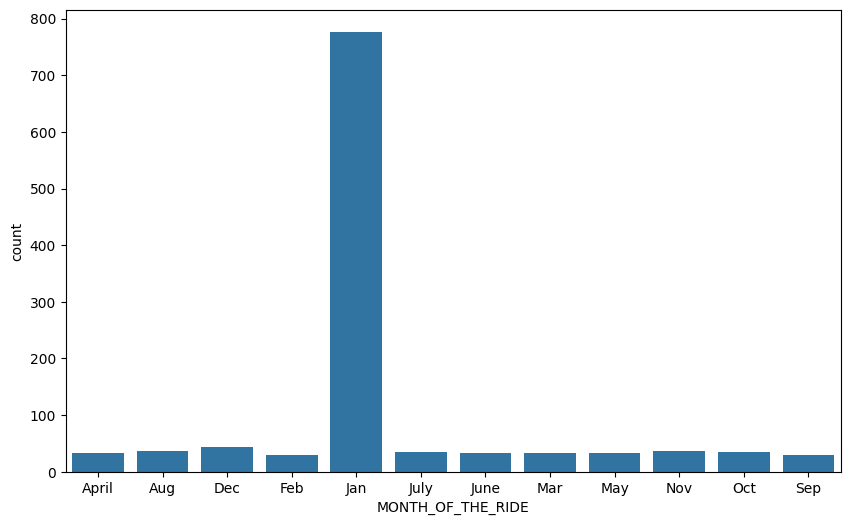

In [25]:
# Convert 'MONTH_OF_THE_RIDE' column to categorical data type
df['MONTH_OF_THE_RIDE'] = df['MONTH_OF_THE_RIDE'].astype('category')

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='MONTH_OF_THE_RIDE')
plt.show()

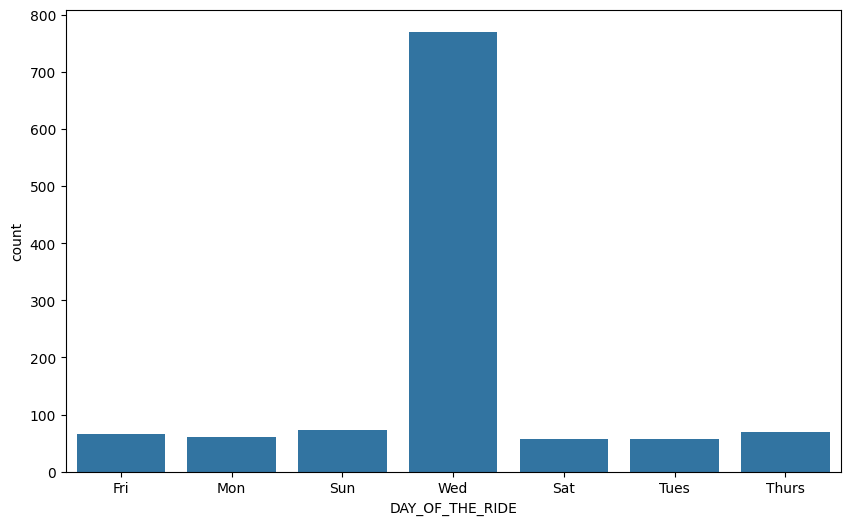

In [26]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='DAY_OF_THE_RIDE')
plt.show()

C:\Users\MAYANK\AppData\Local\Temp\ipykernel_25704\879716397.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp = df.groupby('MONTH_OF_THE_RIDE')['TIME_DAY'].mean().reset_index()


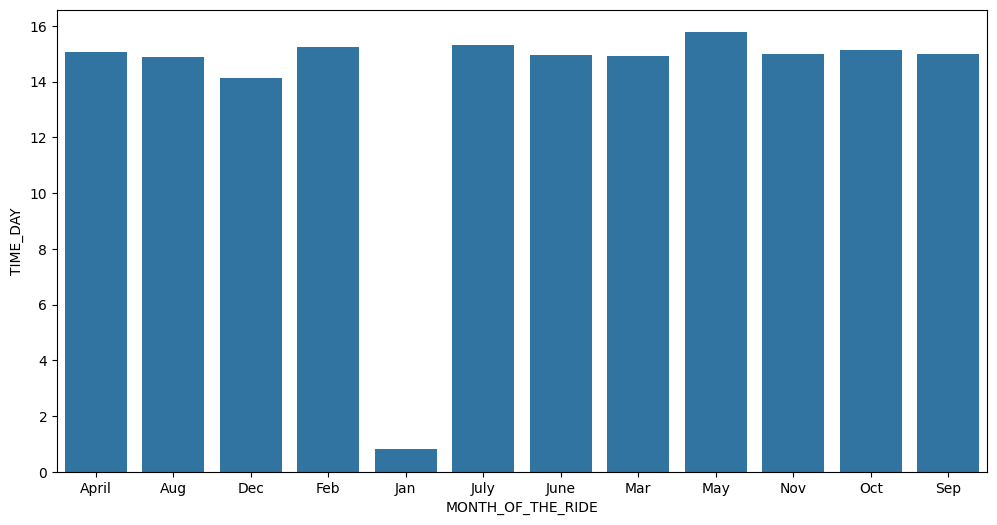

In [27]:
plt.figure(figsize=(12, 6))
temp = df.groupby('MONTH_OF_THE_RIDE')['TIME_DAY'].mean().reset_index()
sns.barplot(x='MONTH_OF_THE_RIDE', y='TIME_DAY', data=temp)
plt.show()

In [28]:
df.to_csv('cleaning_uder_data.csv', index=False)
